<a href="https://colab.research.google.com/github/daliarod96/scraping-Kurt-Vile-lyrics-using-Genius-API/blob/main/data_analysis_and_sentiment_analysis_of_KV_lyrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
lyrics = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kv-lyrics-processed.csv")

In [3]:
lyrics.head()

,Unnamed: 0,song-name,lyrics,release-year,genius-path
0,0,Air Bud,strange strange days inside my mind is daily c...,2013,/Kurt-vile-air-bud-lyrics
1,1,All in a Daze Work,chinese charms and welltanked in burbank stru...,2015,/Kurt-vile-all-in-a-daze-work-lyrics
2,2,Amplifier,don't just stand your head don't sit turn a...,2009,/Kurt-vile-amplifier-lyrics
3,3,Baby’s Arms,there has been but one true love in my babys a...,2011,/Kurt-vile-babys-arms-lyrics
4,4,Bad Omens,instrumental,2015,/Kurt-vile-bad-omens-lyrics


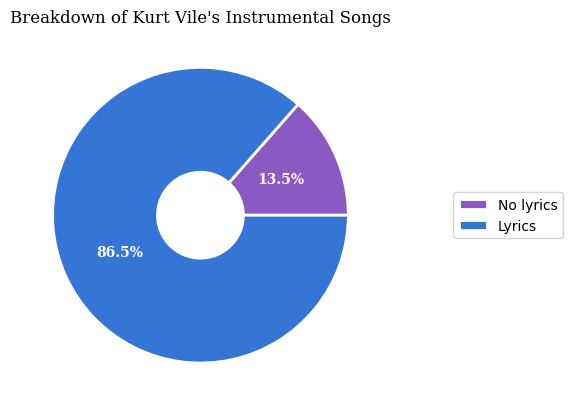

In [4]:
# First I want to know how many instrumental songs he has 

mask = lyrics['lyrics'] == 'instrumental'
lyrics[mask]

labels = ['No lyrics', 'Lyrics']
sizes = [len(lyrics[mask]), len(lyrics) - len(lyrics[mask])]
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes,
       #labels=labels,
       colors = ['#8A5AC2', '#3575D5'],
       wedgeprops = {'edgecolor' : 'white', 'linewidth': 2},
       textprops = {'family':  'serif'},
       autopct='%1.1f%%')
[autotexts[i].set_color('white') for i in range(len(autotexts))]
circle = plt.Circle(xy=(0,0), radius=0.3, facecolor='white')
plt.gca().add_artist(circle)
font = {'family':'serif','color':'black','size':12}
ax.set_title("Breakdown of Kurt Vile's Instrumental Songs", fontdict = font)
ax.legend(wedges, labels,
          loc='center right',
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold", )
plt.show()

plt.show()

I want to analyze KV's lyrics. I will begin by removing instrumental songs from the dataframe.

In [5]:
mask = lyrics['lyrics']== 'instrumental'
instrumentals = list(np.where(mask)[0])
lyrics.drop(instrumentals, inplace=True)
lyrics.reset_index(drop=True, inplace=True)

In [6]:
len(lyrics)

96

First I want to find the most common words in KV lyrics.  I will start by removing stop words because they don't provide any valuable information about his lyrics. Then I will use the Counter class to find the most common words. 

In [7]:
import re
import string
import nltk

import pandas as pd

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')

stop = stopwords.words()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# Remove stop words since they don't tell us anything meaningful about his lyrics
lyrics['lyrics_without_stopwords'] = lyrics['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [9]:
# These are some functions I found online to add color gradients to matplotlib
# credit: https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b

def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

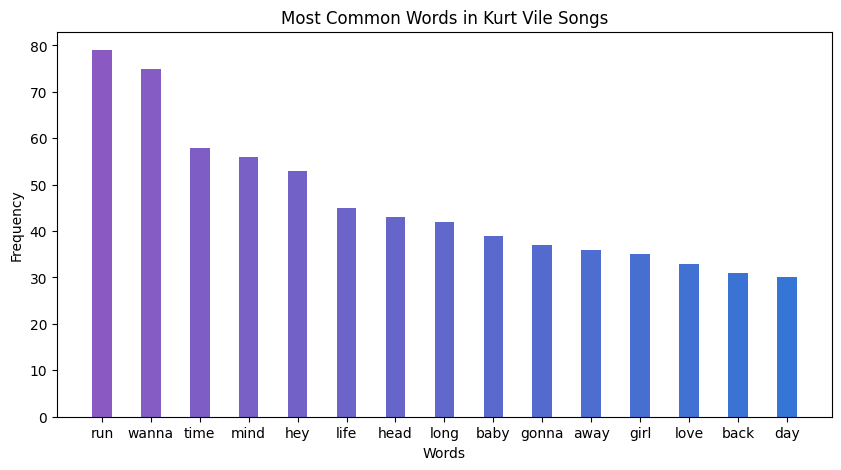

In [10]:
from collections import Counter
most_common_words = Counter(" ".join(lyrics['lyrics_without_stopwords']).split()).most_common(15)
x_vals = [x[0] for x in most_common_words]
y_vals = [x[1] for x in most_common_words]

fig = plt.figure(figsize = (10, 5))

color1 = "#8A5AC2"
color2 = "#3575D5"

# creating the bar plot
plt.bar(x_vals, y_vals, color = get_color_gradient(color1, color2, 15),
        width = 0.4)
 
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words in Kurt Vile Songs")
plt.show()


His most used word is "run". It is probably from his cover of The Velvet Underground's "Run run run."

I personally love that "wanna" and "gonna" are part of his most used words. These words are a reflection of his relaxed and informal writing style.

### **Sentiment Analysis**

Now I will perform sentiment analysis of Kurt Vile's songs using the NLTK Vader Sentiment Analyzer.

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [12]:
analyzer = SentimentIntensityAnalyzer()
lyrics['polarity'] = lyrics['lyrics'].apply(lambda x: analyzer.polarity_scores(x))

Now you can see the polarity score of every Kurt Vile song

In [13]:
lyrics.head()

,Unnamed: 0,song-name,lyrics,release-year,genius-path,lyrics_without_stopwords,polarity
0,0,Air Bud,strange strange days inside my mind is daily c...,2013,/Kurt-vile-air-bud-lyrics,strange strange days inside mind daily changin...,"{'neg': 0.151, 'neu': 0.795, 'pos': 0.054, 'co..."
1,1,All in a Daze Work,chinese charms and welltanked in burbank stru...,2015,/Kurt-vile-all-in-a-daze-work-lyrics,chinese charms welltanked burbank strumming un...,"{'neg': 0.228, 'neu': 0.676, 'pos': 0.095, 'co..."
2,2,Amplifier,don't just stand your head don't sit turn a...,2009,/Kurt-vile-amplifier-lyrics,stand head turn trees toss key 'cause home hom...,"{'neg': 0.104, 'neu': 0.858, 'pos': 0.038, 'co..."
3,3,Baby’s Arms,there has been but one true love in my babys a...,2011,/Kurt-vile-babys-arms-lyrics,love babys arms babys arms hands hold sick hid...,"{'neg': 0.106, 'neu': 0.729, 'pos': 0.165, 'co..."
4,5,Bassackwards,what's in realwhat's in real time ha ha ha ...,2018,/Kurt-vile-bassackwards-lyrics,realwhat's real time beach bay bay away ground...,"{'neg': 0.02, 'neu': 0.793, 'pos': 0.188, 'com..."


In [14]:
# Change data structure
lyrics = pd.concat(
    [lyrics.drop(['Unnamed: 0', 'polarity'], axis=1), 
     lyrics['polarity'].apply(pd.Series)], axis=1)
lyrics.head(3)

,song-name,lyrics,release-year,genius-path,lyrics_without_stopwords,neg,neu,pos,compound
0,Air Bud,strange strange days inside my mind is daily c...,2013,/Kurt-vile-air-bud-lyrics,strange strange days inside mind daily changin...,0.151,0.795,0.054,-0.8020
1,All in a Daze Work,chinese charms and welltanked in burbank stru...,2015,/Kurt-vile-all-in-a-daze-work-lyrics,chinese charms welltanked burbank strumming un...,0.228,0.676,0.095,-0.9520
2,Amplifier,don't just stand your head don't sit turn a...,2009,/Kurt-vile-amplifier-lyrics,stand head turn trees toss key 'cause home hom...,0.104,0.858,0.038,-0.5859


In [15]:
# Create new variable with sentiment "neutral," "positive" and "negative"
lyrics['sentiment'] = lyrics['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
lyrics.head(4)

,song-name,lyrics,release-year,genius-path,lyrics_without_stopwords,neg,neu,pos,compound,sentiment
0,Air Bud,strange strange days inside my mind is daily c...,2013,/Kurt-vile-air-bud-lyrics,strange strange days inside mind daily changin...,0.151,0.795,0.054,-0.8020,negative
1,All in a Daze Work,chinese charms and welltanked in burbank stru...,2015,/Kurt-vile-all-in-a-daze-work-lyrics,chinese charms welltanked burbank strumming un...,0.228,0.676,0.095,-0.9520,negative
2,Amplifier,don't just stand your head don't sit turn a...,2009,/Kurt-vile-amplifier-lyrics,stand head turn trees toss key 'cause home hom...,0.104,0.858,0.038,-0.5859,negative
3,Baby’s Arms,there has been but one true love in my babys a...,2011,/Kurt-vile-babys-arms-lyrics,love babys arms babys arms hands hold sick hid...,0.106,0.729,0.165,0.9331,positive


([<matplotlib.axis.XTick at 0x7f3c122fdae0>,
 [Text(1, 0, 'neg'),
  Text(2, 0, 'neu'),
  Text(3, 0, 'pos'),
  Text(4, 0, 'compound')])

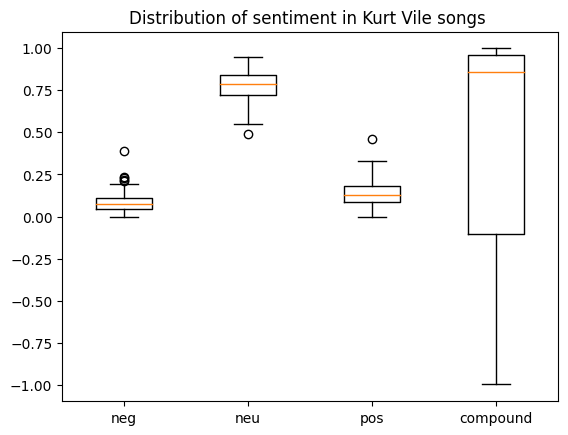

In [21]:
# Box plot of sentiments in Kurt Vile songs
fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of sentiment in Kurt Vile songs ')
ax1.boxplot([lyrics['neg'].tolist(), lyrics['neu'].tolist(), lyrics['pos'].tolist(), lyrics['compound'].tolist()], )
plt.xticks([1, 2, 3,4], ['neg', 'neu', 'pos', 'compound'])

Kurt Vile's songs express similar levels of negative and positive sentiments, with the median positive sentiment being only slightly higher than the median negative sentiment. The words in his songs are mostly neutral in nature, but the average sentiment of his songs is positive (despite overall sentiments ranging from very negative to very positive). This makes sense, Kurt Vile's lyrics mostly describe his environment and arrive at grand truths based on his observations.

Now I want to visualize sentiment information about my favorite Kurt Vile songs.

In [32]:
favorites = ['Baby’s Arms', 'Wakin on a Pretty Day', 'Say the Word', 'Bassackwards', 'Cold Was the Wind', 'All in a Daze Work', 'Was All Talk']

In [33]:
lyrics.loc[lyrics['song-name'].isin(favorites)]


,song-name,lyrics,release-year,genius-path,lyrics_without_stopwords,neg,neu,pos,compound,sentiment
1,All in a Daze Work,chinese charms and welltanked in burbank stru...,2015,/Kurt-vile-all-in-a-daze-work-lyrics,chinese charms welltanked burbank strumming un...,0.228,0.676,0.095,-0.9520,negative
3,Baby’s Arms,there has been but one true love in my babys a...,2011,/Kurt-vile-babys-arms-lyrics,love babys arms babys arms hands hold sick hid...,0.106,0.729,0.165,0.9331,positive
4,Bassackwards,what's in realwhat's in real time ha ha ha ...,2018,/Kurt-vile-bassackwards-lyrics,realwhat's real time beach bay bay away ground...,0.020,0.793,0.188,0.9783,positive
12,Cold Was the Wind,cold was the wind on my frozen face but i didn...,2018,/Kurt-vile-cold-was-the-wind-lyrics,cold wind frozen mind long cold wind brow wann...,0.121,0.794,0.085,-0.8674,negative
90,Wakin on a Pretty Day,wakin' the dawn of day and i gotta think abou...,2013,/Kurt-vile-wakin-on-a-pretty-day-lyrics,wakin' dawn day gotta wanna phone ringing shel...,0.388,0.548,0.064,-0.9965,negative
91,Was All Talk,spirit in the sky transparent to the eye talk...,2013,/Kurt-vile-was-all-talk-lyrics,spirit sky transparent eye talking trash human...,0.028,0.834,0.137,0.9517,positive


Text(0.5, 1.0, 'Sentiment scores of my favorite Kurt Vile songs')

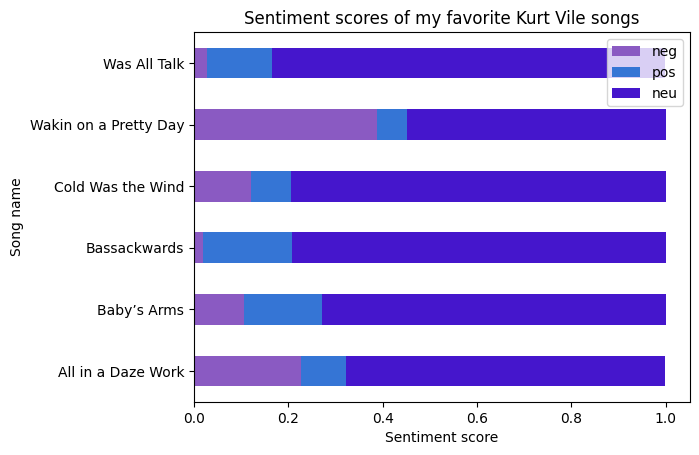

In [39]:
ax = lyrics.loc[lyrics['song-name'].isin(favorites)].plot.barh(x= 'song-name', y = ['neg', 'pos', 'neu'], stacked=True, color=[color1, color2, '#4516cc'])
ax.set_ylabel("Song name")
ax.set_xlabel("Sentiment score")
ax.set_title('Sentiment scores of my favorite Kurt Vile songs')

Kurt Vile's "Wakin' on a Pretty Day," "All in a Daze Work," and "Cold Was the Wind" are the most negative songs out of my favorites. "Wakin' on a Pretty Day" is a song about wanting to be loving and grateful despite lacking enthusiasm for life. It alludes to suicide in a line about a telephone ringing off its shelf, 'I guess he wanted to kill himself' which definitely contributed to the negative sentiment score of the song. "All in a Daze Work"'s phrases " lying here bleedin'" and "cut wide open" are jarring depictions of a broken heart. "Cold Was the Wind" touches upon Kurt Vile's fear of death.

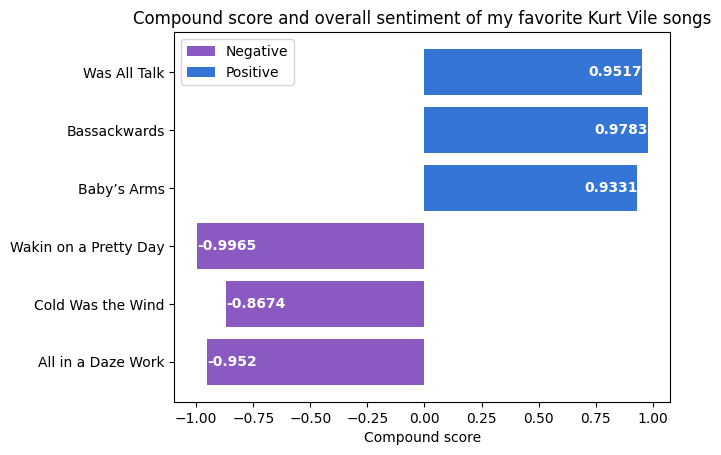

In [40]:
mask1 = lyrics.loc[lyrics['song-name'].isin(favorites)]['compound']<0
mask2 = lyrics.loc[lyrics['song-name'].isin(favorites)]['compound']>0 

fig, ax = plt.subplots()
 
# creating the bar plot
rects1 = ax.barh(lyrics.loc[lyrics['song-name'].isin(favorites)][mask1]['song-name'],
         lyrics.loc[lyrics['song-name'].isin(favorites)][mask1]['compound'],
        color=color1)


rects2 = ax.barh(lyrics.loc[lyrics['song-name'].isin(favorites)][mask2]['song-name'],
         lyrics.loc[lyrics['song-name'].isin(favorites)][mask2]['compound'], 
         color=color2)

ax.set_xlabel('Compound score')
ax.set_title('Compound score and overall sentiment of my favorite Kurt Vile songs')
ax.legend((rects1[0], rects2[0]), ('Negative', 'Positive'))


def autolabel(rects):
  '''
  Attack a text label next to each bar displaying its width
  '''
  for rect in rects:
    width = rect.get_width()
    if width >0:
      ax.text(rect.get_width(), rect.get_y()+rect.get_height()/2, width, ha='right', va='center', fontdict = {'color' : 'white', 'weight': 'bold'})
    else:
      ax.text(rect.get_width(), rect.get_y()+rect.get_height()/2, width, ha='left', va='center', fontdict = {'color' : 'white', 'weight': 'bold'})



autolabel(rects1)
autolabel(rects2)

As expected, "Wakin on a Pretty Day," "Cold Was the Wind," and "All in a Daze Work" are songs that express an overall negative sentiment. "Was All Talk," (Kurt being proud of his accomplishments), "Baby's Arms" (about finding comfort in your lover's arms), and "Bassackwards" (describes Kurt Vile's drug trip and his appreciation for his friend who helped him through a rough time) are all positive songs. 